In [1]:
import pandas as pd

## Carregando o dataset

In [7]:
df = pd.read_csv('tweets_raw_sem_duplicata.csv')
df.head()

,Unnamed: 0,created_at,id,id_str,text,truncated,entities,extended_entities,metadata,source,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,trend_t,score,sentiment
0,0,Wed Feb 22 19:05:12 +0000 2023,1628470980925423620,1628470980925423620,Como atuam\n#MoonlightChickenEP5 \n#HEARTLIMIN...,False,"{'hashtags': [{'text': 'MoonlightChickenEP5', ...","{'media': [{'id': 1628470977553174528, 'id_str...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,False,0,0,False,False,False,pt,MoonlightChickenEP5,0.0000,1
1,1,Wed Feb 22 19:03:55 +0000 2023,1628470659444613122,1628470659444613122,"Eles me fazem acreditar que, relacionamento en...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,False,0,0,False,False,False,pt,MoonlightChickenEP5,0.2263,2
2,2,Wed Feb 22 19:03:34 +0000 2023,1628470570709925890,1628470570709925890,pq eu sinto q isso aqui vai dar muito briga???...,False,"{'hashtags': [{'text': 'MoonlightChickenEP5', ...","{'media': [{'id': 1628470563600490502, 'id_str...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,False,0,0,False,False,False,pt,MoonlightChickenEP5,0.0000,1
3,3,Wed Feb 22 19:03:22 +0000 2023,1628470520084676610,1628470520084676610,O nome salvo dos dois nos Contatos. Fofos.🤏🏽\n...,False,"{'hashtags': [{'text': 'MoonlightChickenEP5', ...","{'media': [{'id': 1628470511100481538, 'id_str...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,False,1,2,False,False,False,pt,MoonlightChickenEP5,0.0000,1
4,4,Wed Feb 22 19:03:10 +0000 2023,1628470471942455297,1628470471942455297,"""Os peixes grandes sempre comem os peixes pequ...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,False,0,0,False,False,NaN,pt,MoonlightChickenEP5,0.5423,2


In [9]:
# separando apenas as variáveis que quero visualizar
tweet_df = df[['text','trend_t','sentiment']]
tweet_df.head()

,text,trend_t,sentiment
0,Como atuam\n#MoonlightChickenEP5 \n#HEARTLIMIN...,MoonlightChickenEP5,1
1,"Eles me fazem acreditar que, relacionamento en...",MoonlightChickenEP5,2
2,pq eu sinto q isso aqui vai dar muito briga???...,MoonlightChickenEP5,1
3,O nome salvo dos dois nos Contatos. Fofos.🤏🏽\n...,MoonlightChickenEP5,1
4,"""Os peixes grandes sempre comem os peixes pequ...",MoonlightChickenEP5,2


In [10]:
tweet_df['sentiment'].value_counts()

1    6435
0    6029
2    4912
Name: sentiment, dtype: int64

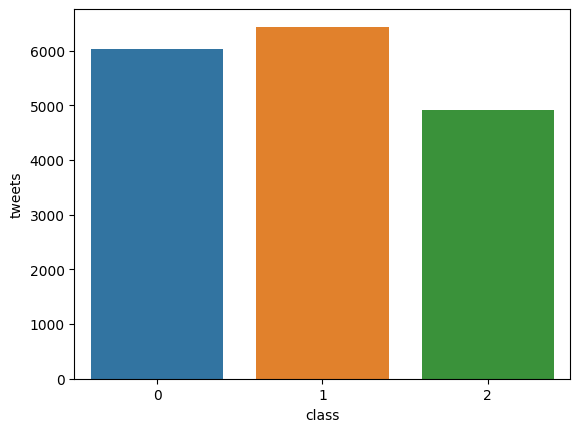

In [11]:
# visualizando os dados em gráfico
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=tweet_df.sentiment)
plt.xlabel('class')
plt.ylabel('tweets')
plt.show();

## Efentuando a limpeza dos dados

In [12]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [13]:
# baixando as stopwords
!python -m nltk.downloader stopwords

C:\Users\alsvi\AppData\Local\Programs\Python\Python310\lib\runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alsvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
import nltk
import re

In [15]:
def remove_caracteres(instancia):
    ''' 
    Função de remoção de caracteres:
    'http\S+' - remove url 
    lower() - tranforma o texto em minúsculo
    '[0-9]+' - remove números
    '[^\w\s]' -  remove pontuação
    '[!#$%^&*()]' - remove caractéres espaciais
    '''
    instancia = re.sub(r'http\S+', '', instancia).lower()
    instancia = re.sub(r'[0-9]+', '', instancia)
    instancia = re.sub(r'[^\w\s]', '', instancia)
    instancia = re.sub('[!#$%^&*()]', '', instancia)
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (' '.join(palavras))

In [16]:
def remove_emojis(string):
    '''Função que remove emojis'''
    emoji_pattern = re.compile("["
                                u"\U0001F600-\U0001F64F"  # emoticons
                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                u"\U00002500-\U00002BEF"  # chinese char
                                u"\U00002702-\U000027B0"
                                u"\U00002702-\U000027B0"
                                u"\U000024C2-\U0001F251"
                                u"\U0001f926-\U0001f937"
                                u"\U00010000-\U0010ffff"
                                u"\u2640-\u2642"
                                u"\u2600-\u2B55"
                                u"\u200d"
                                u"\u23cf"
                                u"\u23e9"
                                u"\u231a"
                                u"\ufe0f"  # dingbats
                                u"\u3030"
                                "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [17]:
# aplicando a limpeza dos dados
tweet_df['text_clean'] = tweet_df['text'].apply(remove_caracteres).apply(remove_emojis)

pd.set_option('display.max_colwidth', None)
tweet_df.head()

C:\Users\alsvi\AppData\Local\Temp\ipykernel_4848\1715463276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['text_clean'] = tweet_df['text'].apply(remove_caracteres).apply(remove_emojis)


,text,trend_t,sentiment,text_clean
0,Como atuam\n#MoonlightChickenEP5 \n#HEARTLIMING https://t.co/Tbp1Gdy7ll,MoonlightChickenEP5,1,atuam moonlightchickenep heartliming
1,"Eles me fazem acreditar que, relacionamento entre amigos, não funciona, mais cedo ou mais tarde, vai desmoronar 😭.… https://t.co/P0Cjt7iTyU",MoonlightChickenEP5,2,fazem acreditar relacionamento amigos funciona cedo tarde vai desmoronar
2,pq eu sinto q isso aqui vai dar muito briga?????? #MoonlightChickenEP5 https://t.co/WHzEhLJK62,MoonlightChickenEP5,1,pq sinto q aqui vai dar briga moonlightchickenep
3,O nome salvo dos dois nos Contatos. Fofos.🤏🏽\n#MoonlightChickenEP5 https://t.co/u85vXyh2nM,MoonlightChickenEP5,1,nome salvo dois contatos fofos moonlightchickenep
4,"""Os peixes grandes sempre comem os peixes pequenos""\n""O importante e ele ter dinheiro, pq quem tem dinheiro sempre v… https://t.co/oGCAXGEqJ0",MoonlightChickenEP5,2,peixes grandes sempre comem peixes pequenos importante ter dinheiro pq dinheiro sempre v


## Lematização com Spacy

In [18]:
%pip install -U pip setuptools wheel
%pip install -U spacy
!python -m spacy download pt_core_news_sm


  Using cached setuptools-67.6.0-py3-none-any.whl (1.1 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.4.0
    Uninstalling setuptools-67.4.0:
      Successfully uninstalled setuptools-67.4.0
  Using cached spacy-3.5.1-cp310-cp310-win_amd64.whl (12.2 MB)
  Using cached thinc-8.1.9-cp310-cp310-win_amd64.whl (1.5 MB)
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.7
    Uninstalling thinc-8.1.7:
      Successfully uninstalled thinc-8.1.7
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.0
    Uninstalling spacy-3.5.0:
      Successfully uninstalled spacy-3.5.0
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/13.0 MB ? eta -:--:--
     - -------------------------------------- 0.5/13.0 MB 16.8 MB/s eta 0:00:01
     ----- ---------------------------------- 1.8/13.0 MB 22.4 MB/s eta 0:00:01
     -------- ------------------------------- 2.7/

In [19]:
import spacy
nlp = spacy.load('pt_core_news_sm')

In [20]:
tweet_df['text_lemma'] = tweet_df['text_clean'].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))
tweet_df['text_lemma'] = tweet_df['text_lemma'].apply(remove_caracteres)
tweet_df.head()

C:\Users\alsvi\AppData\Local\Temp\ipykernel_4848\1740279429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['text_lemma'] = tweet_df['text_clean'].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))
C:\Users\alsvi\AppData\Local\Temp\ipykernel_4848\1740279429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['text_lemma'] = tweet_df['text_lemma'].apply(remove_caracteres)


,text,trend_t,sentiment,text_clean,text_lemma
0,Como atuam\n#MoonlightChickenEP5 \n#HEARTLIMING https://t.co/Tbp1Gdy7ll,MoonlightChickenEP5,1,atuam moonlightchickenep heartliming,atuar moonlightchickenep heartliming
1,"Eles me fazem acreditar que, relacionamento entre amigos, não funciona, mais cedo ou mais tarde, vai desmoronar 😭.… https://t.co/P0Cjt7iTyU",MoonlightChickenEP5,2,fazem acreditar relacionamento amigos funciona cedo tarde vai desmoronar,fazer acreditar relacionamento amigo funcionar cedo tarde ir desmoronar
2,pq eu sinto q isso aqui vai dar muito briga?????? #MoonlightChickenEP5 https://t.co/WHzEhLJK62,MoonlightChickenEP5,1,pq sinto q aqui vai dar briga moonlightchickenep,pq sinto q aqui ir dar briga moonlightchickeneurpr
3,O nome salvo dos dois nos Contatos. Fofos.🤏🏽\n#MoonlightChickenEP5 https://t.co/u85vXyh2nM,MoonlightChickenEP5,1,nome salvo dois contatos fofos moonlightchickenep,nome salvo dois contato fofo moonlightchickenep
4,"""Os peixes grandes sempre comem os peixes pequenos""\n""O importante e ele ter dinheiro, pq quem tem dinheiro sempre v… https://t.co/oGCAXGEqJ0",MoonlightChickenEP5,2,peixes grandes sempre comem peixes pequenos importante ter dinheiro pq dinheiro sempre v,peixe grande sempre comer peixe pequeno importante ter dinheiro pq dinheiro sempre v


# Trabalhando no equilibrio dos dados

## Iniciando o trabalho de balanceamento dos dados

In [21]:
# criando a lista sentimentos (com as quantidades das classes)
sentimentos = []
sentimentos.append(tweet_df.loc[tweet_df['sentiment'] == 0]['sentiment'].count())
sentimentos.append(tweet_df.loc[tweet_df['sentiment'] == 1]['sentiment'].count())
sentimentos.append(tweet_df.loc[tweet_df['sentiment'] == 2]['sentiment'].count())

sentimentos

[6029, 6435, 4912]

In [22]:
# colacando a lista sentimento em ordem (minoria, meio, maioria)
sentimentos.sort()
sentimentos

[4912, 6029, 6435]

In [23]:
# instanciando as classes de sentimentos
sent = [0, 0, 0]
for i in range(len(sentimentos)):
    for j in range(len(sentimentos)):
        if sentimentos[i] == tweet_df.loc[tweet_df['sentiment'] == j]['sentiment'].count():
            sent[i] = tweet_df.loc[tweet_df['sentiment'] == j]

minoria = sent[0]
meio = sent[1]
maioria = sent[2]

In [24]:
print('Maioria \n{}\n'.format(maioria['sentiment'].count()))
print('Meio \n{}\n'.format(meio['sentiment'].count()))
print('Minoria \n{}'.format(minoria['sentiment'].count()))

Maioria 
6435

Meio 
6029

Minoria 
4912


# Igualar a quantidade de tweets entre positivo, negativo e neutro

### Oversampling (Criando datasets reorganizados para maioria)

In [25]:
from sklearn.utils import resample

menor_maior = resample(minoria, replace=True, n_samples=len(maioria), random_state=123)
meio_maior = resample(meio, replace=True, n_samples=len(maioria), random_state=123)

In [26]:
print(menor_maior.count(), meio_maior.count(), maioria.count())

text          6435
trend_t       6435
sentiment     6435
text_clean    6435
text_lemma    6435
dtype: int64 text          6435
trend_t       6435
sentiment     6435
text_clean    6435
text_lemma    6435
dtype: int64 text          6435
trend_t       6435
sentiment     6435
text_clean    6435
text_lemma    6435
dtype: int64


In [27]:
# juntando os dataframes
tweet_df_equilibrado_maior = pd.concat([menor_maior, meio_maior, maioria])

# resetando o index
tweet_df_equilibrado_maior = tweet_df_equilibrado_maior.reset_index()

# removendo as colunas Unnamed: 0 e index
tweet_df_equilibrado_maior.drop(columns=['index'], inplace=True)

In [28]:
tweet_df_equilibrado_maior.groupby(['sentiment']).count()

,text,trend_t,text_clean,text_lemma
sentiment,,,,
0,6435,6435,6435,6435
1,6435,6435,6435,6435
2,6435,6435,6435,6435


# Machine Learning - Utils

In [29]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Vetorizadores
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Classificadores
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

# Avaliador
from sklearn.model_selection import cross_val_predict

In [47]:
# Tokenização especial para tweets
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer()

In [48]:
def escolher_pipeline(pipe):
    ''' Função para escolher os pipelines dos modelos a serem treinados '''
    
    if(pipe == 1):
        modelo1 = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', LogisticRegression(C= 10.0, penalty= 'l1', solver='liblinear'))
        ])
        return modelo1
    
    elif(pipe == 2):
        modelo2 = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', LogisticRegression(C= 10.0, penalty= 'l1', solver='liblinear'))
        ])
        return modelo2
    
    elif(pipe == 3):
        modelo3 = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', PassiveAggressiveClassifier(C= 0.003, loss= 'squared_hinge'))
        ])
        return modelo3
    
    elif(pipe == 4):
        modelo4 = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', PassiveAggressiveClassifier(C= 0.01, loss= 'squared_hinge'))
        ])
        return modelo4
    
    elif(pipe == 5):
        modelo5 = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', RandomForestClassifier(n_estimators= 10))
        ])
        return modelo5
    
    elif(pipe == 6):
        modelo6 = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', RandomForestClassifier(n_estimators= 10))
        ])
        return modelo6
    
    elif(pipe == 7):
        modelo7 = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SGDClassifier(alpha= 0.0001, loss= 'hinge', penalty= 'elasticnet', max_iter=1000))
        ])
        return modelo7
    
    elif(pipe == 8):
        modelo8 = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SGDClassifier(alpha= 0.0001, loss= 'modified_huber', penalty= 'elasticnet', max_iter=1000))
        ])
        return modelo8
    
    elif(pipe == 9):
        modelo9 = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SVC(C= 10, gamma= 0.1, kernel= 'rbf'))
        ])
        return modelo9
    
    elif(pipe == 10):
        modelo10 = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SVC(C= 10, gamma= 1, kernel= 'rbf'))
        ])
        return modelo10

In [33]:
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [34]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

def matriz_confusao(y_test, modelo_predicao):
    ''' Função que exibe a matrix de confusão para avalização do modelo '''
    
    # imprimir relatório de classificação
    print("Relatório de Classificação:\n", 
            metrics.classification_report(y_test, modelo_predicao))
    
    # imprimir a acurácia do modelo
    print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, modelo_predicao)))
    
    # imprimir a matrix de confusão
    print("Matrix de confusão:\n", pd.crosstab(y_test, modelo_predicao, 
                                                rownames=['Real'], 
                                                colnames=['Predito'], 
                                                margins=True),  '')
    
    # plotar a matrix de confusão
    cm = confusion_matrix(y_target = y_test, 
                            y_predicted = modelo_predicao, binary=False)
    fig, ax = plot_confusion_matrix(conf_mat = cm)
    plt.show()
    print('\n')

# Machine Learning - Construindo modelo

In [35]:
X = tweet_df_equilibrado_maior['text_lemma']
y = tweet_df_equilibrado_maior['sentiment']

X.shape, y.shape

((19305,), (19305,))

In [49]:
#separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14478,), (14478,), (4827,), (4827,))

## Modelos

c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


************************************************************************************************************************************
Modelo: Pipeline(steps=[('countVectorizer',
                 CountVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x00000237D8278CA0>>)),
                ('modelo',
                 LogisticRegression(C=10.0, penalty='l1', solver='liblinear'))])

AVALIANDO O MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1619
           1       0.82      0.84      0.83      1598
           2       0.90      0.91      0.90      1610

    accuracy                           0.86      4827
   macro avg       0.86      0.86      0.86      4827
weighted avg       0.86      0.86      0.86      4827

Acurácia: 0.8610

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1355   194    70 

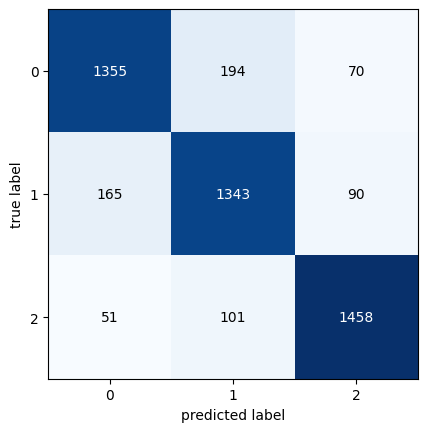




VALIDAÇÃO CRUZADA



c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_ex

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      6435
           1       0.85      0.80      0.82      6435
           2       0.90      0.92      0.91      6435

    accuracy                           0.86     19305
   macro avg       0.86      0.86      0.86     19305
weighted avg       0.86      0.86      0.86     19305

Acurácia: 0.8639

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        5576   631   228   6435
1         848  5159   428   6435
2         184   308  5943   6435
All      6608  6098  6599  19305 


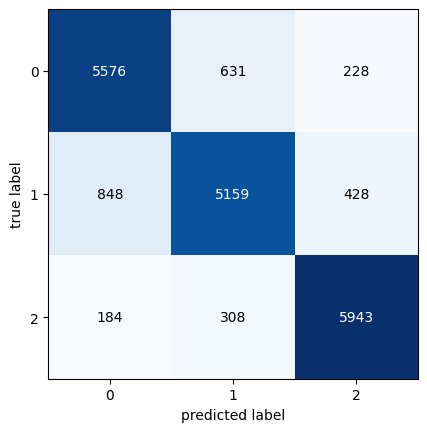

c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


************************************************************************************************************************************
Modelo: Pipeline(steps=[('tfidfVectorizer',
                 TfidfVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x00000237D8278CA0>>)),
                ('modelo',
                 LogisticRegression(C=10.0, penalty='l1', solver='liblinear'))])

AVALIANDO O MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      1619
           1       0.82      0.84      0.83      1598
           2       0.89      0.91      0.90      1610

    accuracy                           0.86      4827
   macro avg       0.86      0.86      0.86      4827
weighted avg       0.86      0.86      0.86      4827

Acurácia: 0.8587

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1347   191    81 

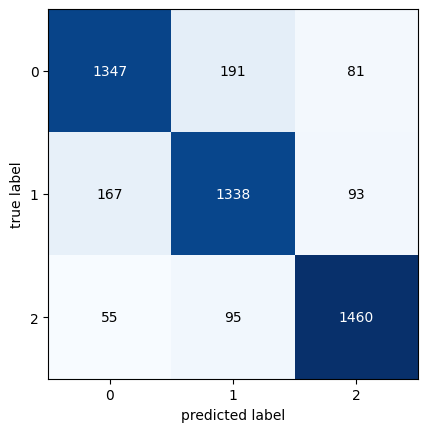




VALIDAÇÃO CRUZADA



c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\svm\_base.py:1244: Convergenc

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      6435
           1       0.85      0.79      0.82      6435
           2       0.90      0.93      0.91      6435

    accuracy                           0.86     19305
   macro avg       0.86      0.86      0.86     19305
weighted avg       0.86      0.86      0.86     19305

Acurácia: 0.8604

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        5577   629   229   6435
1         916  5067   452   6435
2         170   299  5966   6435
All      6663  5995  6647  19305 


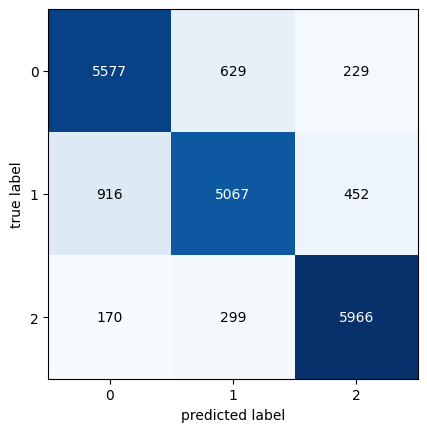

c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


************************************************************************************************************************************
Modelo: Pipeline(steps=[('countVectorizer',
                 CountVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x00000237D8278CA0>>)),
                ('modelo',
                 PassiveAggressiveClassifier(C=0.003, loss='squared_hinge'))])

AVALIANDO O MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1619
           1       0.82      0.84      0.83      1598
           2       0.90      0.90      0.90      1610

    accuracy                           0.86      4827
   macro avg       0.86      0.86      0.86      4827
weighted avg       0.86      0.86      0.86      4827

Acurácia: 0.8554

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1337   203    79  1

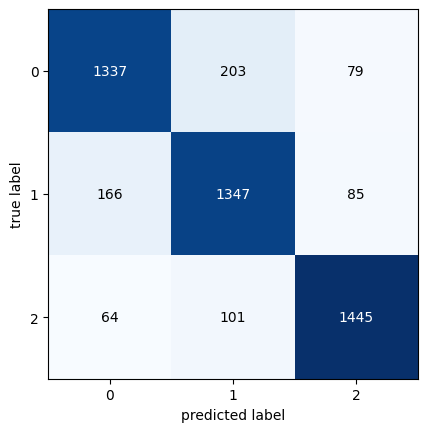




VALIDAÇÃO CRUZADA



c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_ex

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      6435
           1       0.83      0.79      0.81      6435
           2       0.89      0.92      0.90      6435

    accuracy                           0.85     19305
   macro avg       0.85      0.85      0.85     19305
weighted avg       0.85      0.85      0.85     19305

Acurácia: 0.8542

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        5499   687   249   6435
1         870  5078   487   6435
2         188   333  5914   6435
All      6557  6098  6650  19305 


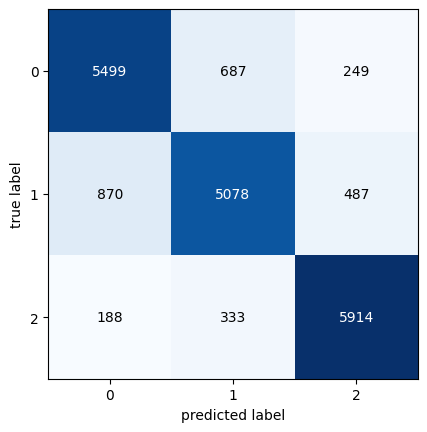

c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


************************************************************************************************************************************
Modelo: Pipeline(steps=[('tfidfVectorizer',
                 TfidfVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x00000237D8278CA0>>)),
                ('modelo',
                 PassiveAggressiveClassifier(C=0.01, loss='squared_hinge'))])

AVALIANDO O MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1619
           1       0.81      0.81      0.81      1598
           2       0.89      0.89      0.89      1610

    accuracy                           0.85      4827
   macro avg       0.84      0.84      0.84      4827
weighted avg       0.84      0.85      0.84      4827

Acurácia: 0.8450

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1347   192    80  16

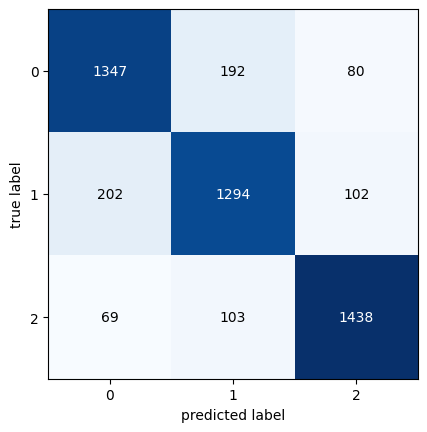




VALIDAÇÃO CRUZADA



c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_ex

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      6435
           1       0.84      0.74      0.79      6435
           2       0.87      0.92      0.89      6435

    accuracy                           0.84     19305
   macro avg       0.84      0.84      0.84     19305
weighted avg       0.84      0.84      0.84     19305

Acurácia: 0.8406

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        5539   629   267   6435
1        1032  4784   619   6435
2         219   312  5904   6435
All      6790  5725  6790  19305 


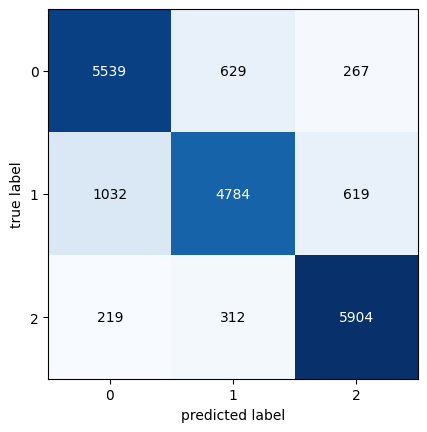

c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


************************************************************************************************************************************
Modelo: Pipeline(steps=[('countVectorizer',
                 CountVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x00000237D8278CA0>>)),
                ('modelo', RandomForestClassifier(n_estimators=10))])

AVALIANDO O MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1619
           1       0.76      0.83      0.79      1598
           2       0.91      0.85      0.88      1610

    accuracy                           0.83      4827
   macro avg       0.84      0.83      0.83      4827
weighted avg       0.84      0.83      0.83      4827

Acurácia: 0.8322

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1320   245    54  1619
1         196  1324    78  1598


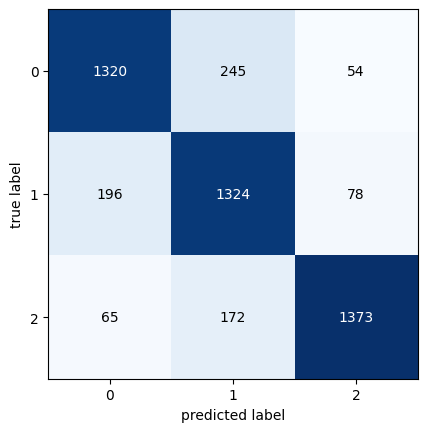




VALIDAÇÃO CRUZADA



c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_ex

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      6435
           1       0.78      0.78      0.78      6435
           2       0.90      0.88      0.89      6435

    accuracy                           0.83     19305
   macro avg       0.83      0.83      0.83     19305
weighted avg       0.83      0.83      0.83     19305

Acurácia: 0.8333

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        5393   840   202   6435
1         998  5027   410   6435
2         214   554  5667   6435
All      6605  6421  6279  19305 


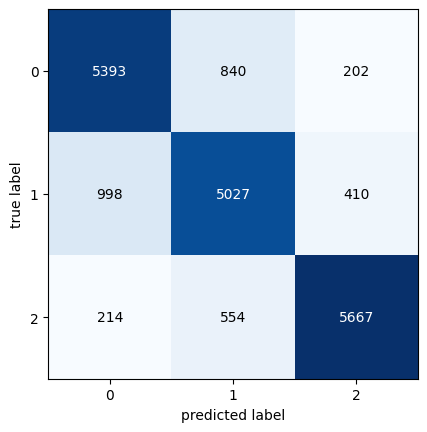

c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


************************************************************************************************************************************
Modelo: Pipeline(steps=[('tfidfVectorizer',
                 TfidfVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x00000237D8278CA0>>)),
                ('modelo', RandomForestClassifier(n_estimators=10))])

AVALIANDO O MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1619
           1       0.76      0.83      0.79      1598
           2       0.90      0.84      0.87      1610

    accuracy                           0.83      4827
   macro avg       0.83      0.83      0.83      4827
weighted avg       0.83      0.83      0.83      4827

Acurácia: 0.8285

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1326   230    63  1619
1         193  1319    86  1598


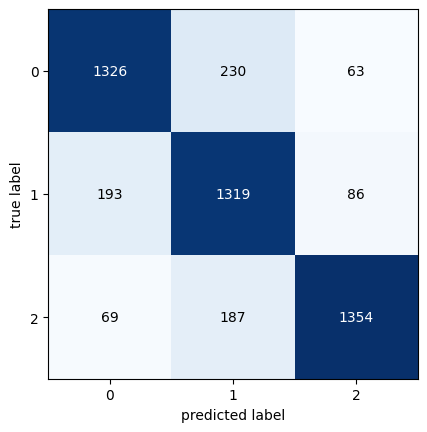




VALIDAÇÃO CRUZADA



c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_ex

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82      6435
           1       0.78      0.74      0.76      6435
           2       0.89      0.88      0.88      6435

    accuracy                           0.82     19305
   macro avg       0.82      0.82      0.82     19305
weighted avg       0.82      0.82      0.82     19305

Acurácia: 0.8205

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        5442   783   210   6435
1        1165  4755   515   6435
2         239   553  5643   6435
All      6846  6091  6368  19305 


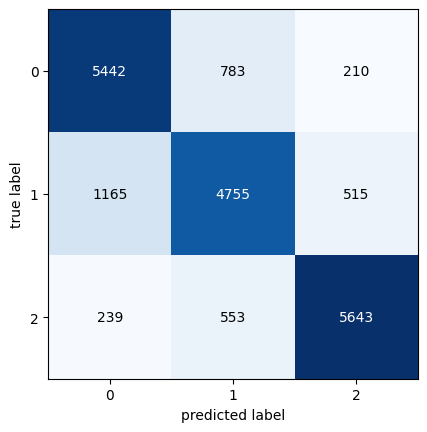

c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


************************************************************************************************************************************
Modelo: Pipeline(steps=[('countVectorizer',
                 CountVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x00000237D8278CA0>>)),
                ('modelo', SGDClassifier(penalty='elasticnet'))])

AVALIANDO O MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.87      0.80      0.84      1619
           1       0.80      0.87      0.83      1598
           2       0.90      0.89      0.90      1610

    accuracy                           0.85      4827
   macro avg       0.86      0.85      0.85      4827
weighted avg       0.86      0.85      0.85      4827

Acurácia: 0.8537

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1297   235    87  1619
1         135  1388    75  1598
2   

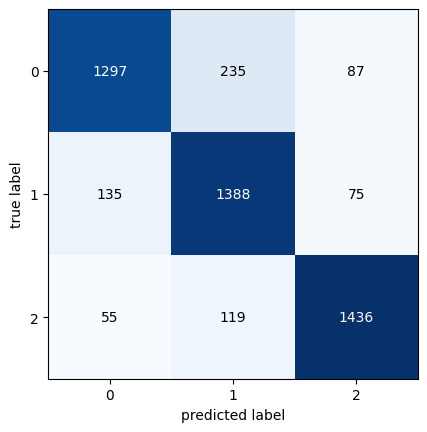




VALIDAÇÃO CRUZADA



c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_ex

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      6435
           1       0.81      0.82      0.82      6435
           2       0.89      0.90      0.90      6435

    accuracy                           0.85     19305
   macro avg       0.85      0.85      0.85     19305
weighted avg       0.85      0.85      0.85     19305

Acurácia: 0.8510

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        5314   828   293   6435
1         732  5307   396   6435
2         202   426  5807   6435
All      6248  6561  6496  19305 


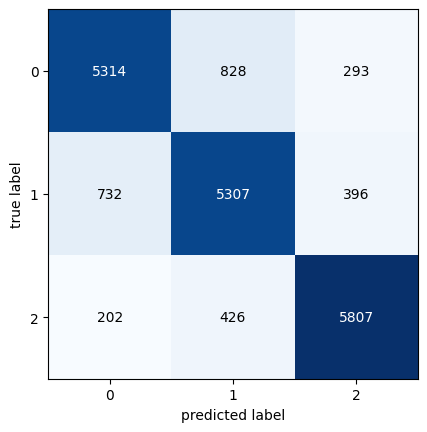

c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


************************************************************************************************************************************
Modelo: Pipeline(steps=[('tfidfVectorizer',
                 TfidfVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x00000237D8278CA0>>)),
                ('modelo',
                 SGDClassifier(loss='modified_huber', penalty='elasticnet'))])

AVALIANDO O MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1619
           1       0.81      0.82      0.81      1598
           2       0.89      0.89      0.89      1610

    accuracy                           0.84      4827
   macro avg       0.84      0.84      0.84      4827
weighted avg       0.84      0.84      0.84      4827

Acurácia: 0.8432

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1326   201    92  1

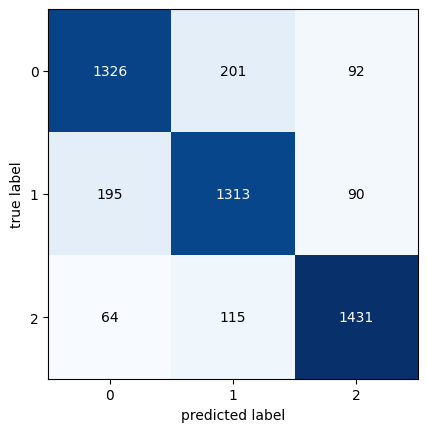




VALIDAÇÃO CRUZADA



c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_ex

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      6435
           1       0.81      0.76      0.79      6435
           2       0.88      0.90      0.89      6435

    accuracy                           0.83     19305
   macro avg       0.83      0.83      0.83     19305
weighted avg       0.83      0.83      0.83     19305

Acurácia: 0.8337

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        5391   743   301   6435
1        1000  4910   525   6435
2         248   393  5794   6435
All      6639  6046  6620  19305 


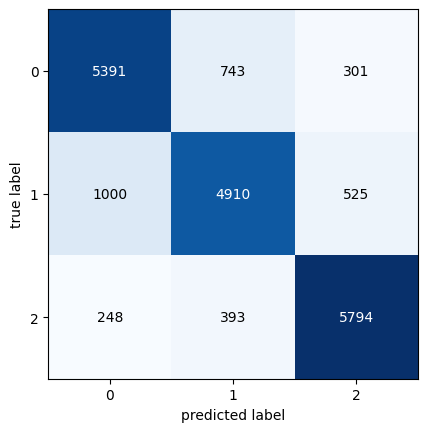

c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


************************************************************************************************************************************
Modelo: Pipeline(steps=[('countVectorizer',
                 CountVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x00000237D8278CA0>>)),
                ('modelo', SVC(C=10, gamma=0.1))])

AVALIANDO O MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1619
           1       0.80      0.87      0.83      1598
           2       0.92      0.88      0.90      1610

    accuracy                           0.86      4827
   macro avg       0.86      0.86      0.86      4827
weighted avg       0.86      0.86      0.86      4827

Acurácia: 0.8610

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1351   212    56  1619
1         139  1391    68  1598
2          64   132

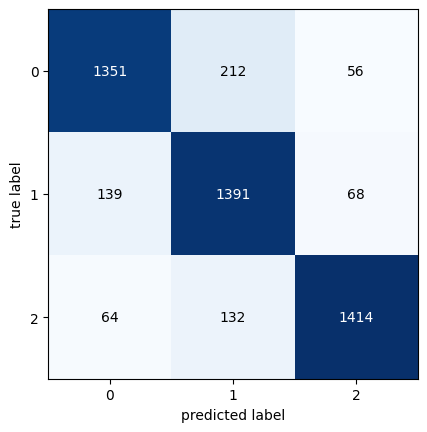




VALIDAÇÃO CRUZADA



c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_ex

KeyboardInterrupt: 

In [32]:
reports=[]
modelos=[]

for i in range(1,11):
    modelo = escolher_pipeline(i)
    nome = (str(modelo))# nome do modelo
    modelo = modelo.fit(X_train, y_train)
    modelo_pred = modelo.predict(X_test)
    
    #relatório
    reports.append(metrics.classification_report(y_test, modelo_pred, output_dict=True))
    modelos.append(nome)
    
    print("*"*132)
    print(f"Modelo: {nome}\n")
    print("AVALIANDO O MODELO\n")
    matriz_confusao(y_test, modelo_pred)
    
    print('\nVALIDAÇÃO CRUZADA\n')
    validacao_cruzada = cross_val_predict(modelo, X, y, cv=10)
    matriz_confusao(y, validacao_cruzada)

## Geração do relatório para análise do melhor modelo

In [ ]:
# criando o dataframe para o relatório consolidado
columns = ['modelo', 'f1_score', 'accuracy']
report_df = pd.DataFrame(columns=columns)

In [ ]:
# loop para criação do relátorio consolidado
for i in range(len(reports)):
    report_df.loc[i] = [modelos[i],
                    round(reports[i]['weighted avg']['f1-score'], 2), 
                    round(reports[i]['accuracy'], 2)]

In [ ]:
def formatar_nome_modelo(modelo):
    ''' Função que formata o nome do modelo junto com o vetorizador '''
    vec = modelo[18:33] #nome do vetorizador
    
    start_name = (modelo.rfind("modelo")+9) #início do nome do classificador
    end_name = (modelo.rfind('(')) #fim do nome do classificador
    
    classif = modelo[start_name: end_name] #nome completo do classificador
    return(f'{classif} - {vec}')

In [ ]:
report_df['modelo'] = report_df['modelo'].apply(formatar_nome_modelo)
report_df.sort_values(by='accuracy', ascending=False)

,modelo,f1_score,accuracy
0,LogisticRegression - countVectorizer,0.86,0.86
1,LogisticRegression - tfidfVectorizer,0.86,0.86
2,PassiveAggressiveClassifier - countVectorizer,0.86,0.86
8,SVC - countVectorizer,0.86,0.86
9,SVC - tfidfVectorizer,0.87,0.86
3,PassiveAggressiveClassifier - tfidfVectorizer,0.85,0.85
6,SGDClassifier - countVectorizer,0.85,0.85
4,RandomForestClassifier - countVectorizer,0.84,0.84
7,SGDClassifier - tfidfVectorizer,0.84,0.84
5,RandomForestClassifier - tfidfVectorizer,0.83,0.83


# Salvando o melhor modelo

In [57]:
from sklearn.feature_extraction.text import TfidfTransformre

# instanciando o vetorizador
count_vect = CountVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [58]:
# instanciando o modelo
model = LogisticRegression(C= 10.0, penalty= 'l1', solver='liblinear').fit(X_train_tfidf, y_train)

c:\Users\alsvi\notebooks\analise_sentimet_twitter_2023\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [59]:
import pickle

# Save the vectorizer
vec_file = 'vectorizer.pickle'
pickle.dump(count_vect, open(vec_file, 'wb'))

# Save the model
mod_file = 'classification.model'
pickle.dump(model, open(mod_file, 'wb'))

# Testando o classificador

In [61]:
# Load the classification model from disk and use for predictions
def classify_utterance(utt):
    # load the vectorizer
    loaded_vectorizer = pickle.load(open('vectorizer.pickle', 'rb'))

    # load the model
    loaded_model = pickle.load(open('classification.model', 'rb'))

    # make a prediction
    return loaded_model.predict(loaded_vectorizer.transform([utt]))

In [64]:
for x in X_test:
    print(classify_utterance(x))

[1]
[2]
[2]
[1]
[2]
[2]
[0]
[1]
[0]
[1]
[1]
[0]
[0]
[1]
[2]
[2]
[1]
[0]
[1]
[1]
[1]
[0]
[2]
[1]
[0]
[2]
[1]
[0]
[0]
[0]
[2]
[2]
[1]
[2]
[0]
[2]
[0]
[2]
[0]
[0]
[2]
[2]
[0]
[2]
[1]
[1]
[0]
[2]
[0]
[0]
[0]
[1]
[2]
[2]
[2]
[1]
[0]
[0]
[2]
[2]
[1]
[2]
[2]
[0]
[0]
[2]
[0]
[0]
[0]
[0]
[1]
[2]
[0]
[2]
[1]
[2]
[2]
[0]
[1]
[2]
[2]
[1]
[0]
[1]
[2]
[1]
[0]
[2]
[0]
[0]
[0]
[0]
[2]
[2]
[1]
[0]
[2]
[0]
[0]
[1]
[1]
[2]
[0]
[2]
[2]
[1]
[0]
[1]
[2]
[0]
[0]
[0]
[0]
[0]
[2]
[0]
[2]
[0]
[1]
[2]
[2]
[0]
[2]
[1]
[0]
[1]
[0]
[2]
[2]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[2]
[2]
[2]
[0]
[1]
[0]
[2]
[1]
[0]
[1]
[2]
[0]
[2]
[1]
[1]
[0]
[1]
[1]
[2]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[2]
[2]
[2]
[2]
[2]
[1]
[0]
[0]
[1]
[1]
[0]
[1]
[0]
[2]
[0]
[1]
[1]
[2]
[0]
[2]
[0]
[2]
[1]
[0]
[1]
[0]
[2]
[0]
[0]
[2]
[1]
[1]
[0]
[2]
[0]
[2]
[2]
[2]
[2]
[0]
[2]
[1]
[0]
[0]
[1]
[0]
[0]
[1]
[2]
[0]
[2]
[2]
[0]
[1]
[0]
[2]
[0]
[0]
[0]
[2]
[2]
[1]
[0]
[0]
[2]
[2]
[0]
[0]
[0]
[0]
[2]
[2]
[0]
[0]
[2]
[0]
[0]
[0]
[2]
[0]
[0]
[2]
[1]
[2]
[1]
[0]
